# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

## Load and display the data

In [ ]:
X = pd.read_csv('Tweets.csv')
print(X.shape)
print(X.head(10))
y = pd.read_csv('ground_truth.csv', names = ['label'])
print(y.shape)
print(y.head(10))

(11099, 21)
                       created_at            id        id_str  \
0  Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1  Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2  Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   
3  Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
4  Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   
5  Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
6  Tue Jul 31 13:34:35 +0000 2018  1.024290e+18  1.024290e+18   
7  Tue Jul 31 13:34:13 +0000 2018  1.024290e+18  1.024290e+18   
8  Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
9  Tue Jul 31 13:34:25 +0000 2018  1.024290e+18  1.024290e+18   

                                                text  truncated  \
0  RT @EdwardTHardy: The 7th US Circuit Court of ...      False   
1  RT @VenomMovie: The world has enough superhero...      False   
2  RT @FutbolBible: Teachers vs Students match &a...      False   
3  R

In [ ]:
print(list(X.columns))

['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'is_quote_status', 'retweet_count', 'favorite_count', 'lang', 'user_name', 'user_screen_name', 'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_created_at', 'user_favourites_count', 'user_verified', 'user_statuses_count']


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [ ]:
X.isna().sum()

created_at               0
id                       0
id_str                   0
text                     0
truncated                0
entities                 0
metadata                 0
source                   0
is_quote_status          0
retweet_count            0
favorite_count           0
lang                     0
user_name                0
user_screen_name         0
user_followers_count     0
user_friends_count       0
user_listed_count        0
user_created_at          0
user_favourites_count    0
user_verified            0
user_statuses_count      0
dtype: int64

(array([1.0928e+04, 1.4000e+02, 1.2000e+01, 1.2000e+01, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0. ,  41371.9,  82743.8, 124115.7, 165487.6, 206859.5,
        248231.4, 289603.3, 330975.2, 372347.1, 413719. ]),
 <a list of 10 Patch objects>)

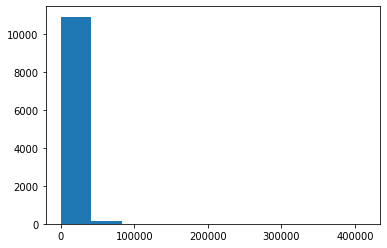

In [ ]:
plt.hist(X['retweet_count'])

(array([1.1096e+04, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
         90.9, 101. ]),
 <a list of 10 Patch objects>)

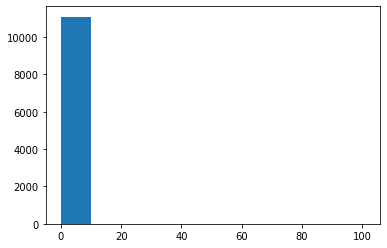

In [ ]:
plt.hist(X['favorite_count'])

## Part-1
*Vectorize tweets using only meta data*

In [ ]:
def get_features(X):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """
  return X[['is_quote_status', 'retweet_count', 'user_followers_count', 'user_friends_count', 'user_statuses_count','user_favourites_count']]
  # your code here

In [ ]:
metaX = get_features(X)
metaX['is_quote_status'] = metaX['is_quote_status'] * 1
metaX

<ipython-input-38-5a89bd26f542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metaX['is_quote_status'] = metaX['is_quote_status'] * 1


,is_quote_status,retweet_count,user_followers_count,user_friends_count,user_statuses_count,user_favourites_count
0,0,113,153,264,31308,32984
1,0,5902,780,382,87272,6648
2,0,3745,255,246,1731,5426
3,0,10,2419,2428,2153,5993
4,0,25306,314,722,33503,6285
...,...,...,...,...,...,...
11094,0,5,802,1353,6491,79149
11095,0,8393,429,599,5065,2029
11096,0,0,135,94,4265,90
11097,0,18,505,243,13604,15829


Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [ ]:
norm_metaX=(metaX-metaX.min())/(metaX.max()-metaX.min())
norm_metaX

,is_quote_status,retweet_count,user_followers_count,user_friends_count,user_statuses_count,user_favourites_count
0,0.0,0.000273,0.000008,0.000517,0.010991,0.051868
1,0.0,0.014266,0.000039,0.000749,0.030639,0.010454
2,0.0,0.009052,0.000013,0.000482,0.000607,0.008533
3,0.0,0.000024,0.000120,0.004758,0.000756,0.009424
4,0.0,0.061167,0.000016,0.001415,0.011762,0.009883
...,...,...,...,...,...,...
11094,0.0,0.000012,0.000040,0.002651,0.002279,0.124464
11095,0.0,0.020287,0.000021,0.001174,0.001778,0.003191
11096,0.0,0.000000,0.000007,0.000184,0.001497,0.000142
11097,0.0,0.000044,0.000025,0.000476,0.004776,0.024891


In [ ]:
from sklearn.model_selection import train_test_split
y = np.array(y) 
X_train, X_test, y_train, y_test = train_test_split(norm_metaX, y, train_size = 0.80, random_state = 1234)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
accuracies = []
for k in range(1, 101):
  neighbors = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X_train)
  distances, indices = neighbors.kneighbors(X_test)
  predictions = [1.0 * (y_train[indlist] == 1.0).sum() > k/2  for indlist in indices]
  accuracies.append(accuracy_score(predictions, y_test))

Maximum accuracy is 96.44144144144144% for value of K = 30


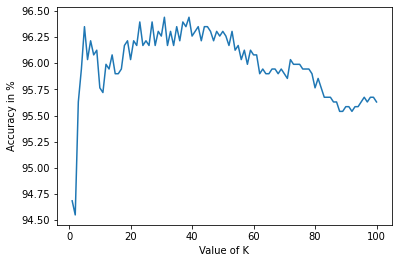

In [ ]:
print(f'Maximum accuracy is {max(accuracies)*100}% for value of K = {accuracies.index(max(accuracies))}')
plt.xlabel('Value of K')
plt.ylabel('Accuracy in %')
xaxis = list(range(1, 101))
yaxis = np.array(accuracies) * 100
plt.plot(xaxis, yaxis)
plt.show()

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [ ]:
def tweet_vectoriser(X):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  return X['text']
  # your code here

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
tweets = tweet_vectoriser(X)
common = stopwords.words('english')
t = []
for twt in tweets:
  parts = twt.split('http')
  msg = parts[0]
  text = ""
  words = msg.split(' ')
  if words[0] == 'RT':
    del words[:2]
  for word in words:
    if word not in common:
      text = text + ' ' + word
  msg = text[1:]
  regex = re.compile('[^a-zA-Z ]')
  msg = regex.sub(' ', msg)
  msg = msg.lower()
  msg = re.sub(' +', ' ', msg)
  text = ''
  words = msg.split(' ')
  for word in words:
    if len(word) > 1:
      text = text + ' ' + lemmatizer.lemmatize(word)
  msg = text[1:]
  t.append(msg)
t

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['the th u circuit court appeal upheld lower court ruling blocked indiana mandate forcing woman undergo',
 'the world enough superheroes watch new venom trailer now',
 'teacher v student match amp one teacher this',
 'someone the office actually responded netflix tweet the office',
 'starbucks asking soy milk man behind trying make fun thinking heal',
 'exo magic trick one snap thing flashed screen but yall wait for it',
 'really going miss girl swear god would worst day ever',
 'fubar amandadonnell sw only taker human life greatest sin all',
 'each year wsts show wisys uw system make university teaching research public service available',
 'thanks benjaminstaal fantastic photo boat',
 'they made tipton actually hotel disney world disney land',
 'anigga gone act right girl really wanna don force anigga nothing',
 'look headline aajtak mishra alleged kejriwal crore corruption they even put question',
 'council proud named best place live canada moneysense oakvilleproud',
 'yesterday hou

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
vectorizer = TfidfVectorizer()
textVectors = vectorizer.fit_transform(t)
textVectors = textVectors.toarray()
print(textVectors.shape)
print(vectorizer.get_feature_names_out())
# textVectors = np.array(textVectors)
pca = PCA(n_components = 25)
textVectors = pca.fit_transform(textVectors)

(11099, 20905)
['aaaaaaaaaand' 'aaaaall' 'aaaah' ... 'zwift' 'zylofon' 'zzaannnaaa']


In [ ]:
print(textVectors)
norm_textX = (textVectors-textVectors.min())/((textVectors.max()-textVectors.min())*10)
norm_textX = pd.DataFrame(norm_textX)
norm_textX

[[ 9.50232310e-03 -8.74725307e-03 -3.73243409e-03 ...  6.24299321e-03
   7.12228172e-03 -1.94925033e-02]
 [ 9.64159266e-01  5.63958310e-02  1.81714515e-02 ... -1.68601510e-03
  -1.57251252e-02  1.47349565e-03]
 [-2.68539227e-02 -5.40615783e-03  6.18642720e-02 ... -6.10203097e-02
  -1.27333924e-02 -7.96874132e-03]
 ...
 [-9.83255214e-02  8.48563022e-01 -3.58282054e-01 ...  7.34593609e-03
  -3.05209272e-03  5.73718105e-05]
 [ 4.33811050e-02 -1.39689170e-02  2.00409082e-04 ...  1.47309378e-03
  -2.61533417e-02 -2.59509202e-03]
 [ 3.73053946e-02  5.11843061e-01 -6.59943980e-03 ... -8.11442356e-03
  -2.88222545e-03  1.56431455e-02]]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.031499,0.030190,0.030549,0.033624,0.029751,0.033343,0.029280,0.031150,0.029772,0.029220,...,0.031404,0.030896,0.028791,0.029660,0.030396,0.030172,0.030896,0.031265,0.031328,0.029419
1,0.100000,0.034864,0.032121,0.020371,0.033191,0.025263,0.031190,0.030292,0.030683,0.032400,...,0.030202,0.031027,0.031950,0.031507,0.031359,0.031487,0.030395,0.030696,0.029689,0.030923
2,0.028890,0.030429,0.035256,0.028534,0.037634,0.032048,0.029734,0.035464,0.031429,0.031645,...,0.032895,0.036377,0.027919,0.032612,0.031957,0.024388,0.028277,0.026439,0.029904,0.030245
3,0.035016,0.030947,0.030041,0.039990,0.028356,0.039293,0.031262,0.030632,0.031675,0.028856,...,0.029332,0.030850,0.030307,0.030303,0.028884,0.028635,0.033140,0.033353,0.032321,0.028851
4,0.029212,0.029343,0.030459,0.029288,0.029900,0.028727,0.029466,0.030336,0.025771,0.029207,...,0.030005,0.025334,0.035481,0.032848,0.028229,0.030013,0.055700,0.022281,0.012455,0.017802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,0.029729,0.029892,0.030832,0.030195,0.030224,0.029969,0.029457,0.030813,0.029369,0.031169,...,0.030458,0.030949,0.029246,0.029914,0.030709,0.030980,0.031355,0.030510,0.030613,0.031012
11095,0.031903,0.029955,0.030281,0.035107,0.030044,0.034940,0.025095,0.028816,0.037370,0.026851,...,0.028214,0.032745,0.037647,0.030214,0.028340,0.028844,0.030615,0.031978,0.032316,0.031128
11096,0.023762,0.091705,0.005109,0.009398,0.028533,0.041663,0.028475,0.031188,0.031234,0.030562,...,0.030889,0.030894,0.030941,0.030252,0.030596,0.031057,0.031190,0.031344,0.030598,0.030821
11097,0.033930,0.029815,0.030832,0.028549,0.030145,0.028773,0.029733,0.031266,0.028242,0.031998,...,0.038193,0.028027,0.031684,0.031102,0.032841,0.029887,0.030649,0.030923,0.028941,0.030631


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_textX, y, train_size = 0.80, random_state = 1234)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
accuracies = []
for k in range(1, 101):
  neighbors = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X_train)
  distances, indices = neighbors.kneighbors(X_test)
  predictions = [1.0 * (y_train[indlist] == 1.0).sum() > k/2  for indlist in indices]
  accuracies.append(accuracy_score(predictions, y_test))

Maximum accuracy is 94.32432432432432% for value of K = 5


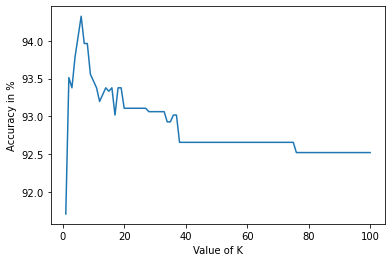

In [ ]:
print(f'Maximum accuracy is {max(accuracies)*100}% for value of K = {accuracies.index(max(accuracies))}')
plt.xlabel('Value of K')
plt.ylabel('Accuracy in %')
xaxis = list(range(1, 101))
yaxis = np.array(accuracies) * 100
plt.plot(xaxis, yaxis)
plt.show()

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [ ]:
finalX = pd.concat([norm_metaX, norm_textX], axis=1)
finalX = np.array(finalX)
finalX

array([[0.00000000e+00, 2.73132247e-04, 7.56981222e-06, ...,
        3.12652377e-02, 3.13283305e-02, 2.94186011e-02],
       [0.00000000e+00, 1.42657214e-02, 3.85911996e-05, ...,
        3.06962960e-02, 2.96889273e-02, 3.09230050e-02],
       [0.00000000e+00, 9.05203774e-03, 1.26163537e-05, ...,
        2.64387959e-02, 2.99035974e-02, 3.02454824e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 6.67924608e-06, ...,
        3.13443787e-02, 3.05982738e-02, 3.08213918e-02],
       [0.00000000e+00, 4.35077915e-05, 2.49853279e-05, ...,
        3.09229761e-02, 2.89406562e-02, 3.06310657e-02],
       [0.00000000e+00, 0.00000000e+00, 1.75144675e-05, ...,
        3.02350290e-02, 3.06104626e-02, 3.19397405e-02]])

Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [ ]:
XX_train, XX_test, y_train, y_test = train_test_split(finalX, y, test_size = 0.20, random_state=1234)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
accuracies = []
for k in range(1, 101):
  neighbors = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(XX_train)
  distances, indices = neighbors.kneighbors(XX_test)
  predictions = [1.0 * (y_train[indlist] == 1.0).sum() > k/2  for indlist in indices]
  accuracies.append(accuracy_score(predictions, y_test))

Maximum accuracy is 96.3963963963964% for value of K = 25


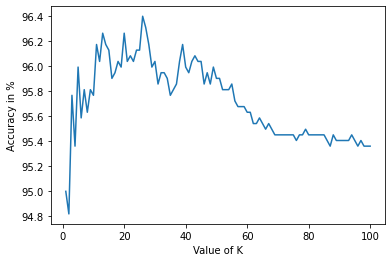

In [ ]:
print(f'Maximum accuracy is {max(accuracies)*100}% for value of K = {accuracies.index(max(accuracies))}')
plt.xlabel('Value of K')
plt.ylabel('Accuracy in %')
xaxis = list(range(1, 101))
yaxis = np.array(accuracies) * 100
plt.plot(xaxis, yaxis)
plt.show()

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

Using the meta data the accuracy we achieved is 96.44144144144144% for value of K = 30 


and using the text we got accuracy of 94.32432432432432% for value of K = 5


but on combining the text and meta data the accuracy decreases by some amount
to 


96.3963963963964% for value of K = 25


so we can infer that for some instances the text and meta features are contradicting while prediction and hence reducing the overall final accuracy.